In [1]:
import pandas as pd

# We get the path of the dataset first
file_path = "/Users/poojabathla/Desktop/GitHub ML/VicCrashAnalytics/Dataset/Blackspot.csv"


In [2]:

# Load the dataset
blackspot_df = pd.read_csv(file_path)
blackspot_df_copy = blackspot_df.copy()



In [3]:
# Display first few rows and explore the dataset
print(blackspot_df.head())
print(blackspot_df.info())
print(blackspot_df.shape)


     ID       EZI_ROAD_NAME      ROAD_NAME ROAD_TYPE  \
0  3699          GROVE ROAD          GROVE      ROAD   
1   576  BACCHUS MARSH ROAD  BACCHUS MARSH      ROAD   
2   758        GRUBBED ROAD        GRUBBED      ROAD   
3    89        VIGOR STREET          VIGOR    STREET   
4  8773        FAIRMAN ROAD        FAIRMAN      ROAD   

   AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                  0.121988           0.058735           0.228916   
1                  0.215894           0.141722           0.312583   
2                  0.185304           0.102236           0.194888   
3                  0.167763           0.062500           0.286184   
4                  0.201238           0.108359           0.204334   

   AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
0           0.269578             0.853916             0.320783  ...   
1           0.201325             0.741722             0.128477  ...   
2           0.348243             0.

In [4]:
# Check for number of missing values in the dataset in each column
print(blackspot_df.isnull().sum())


ID                                 0
EZI_ROAD_NAME                      0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
AGE_18YRS_OVER_PCNT                0
AGE_65YRS_OVER_PCNT                9
SEO_PERSONS_PCNT                   0
FC_COUPLE_NO_CHILDREN_PCNT         0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_SINGLE_PARENT                   0
CARS_ZERO_HH_PCNT                  0
CARS_ONE_HH_PCNT                   0
CARS_TWO_OR_MORE_HH_PCNT           0
DWELLING_SEP_HOUSE_PCNT            0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_FLAT_UNIT_APART_PCNT      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
P

In [5]:
#Checking for skewness
print("Skewness for AGE_65YRS_OVER_PCNT: ", blackspot_df["AGE_65YRS_OVER_PCNT"].skew())
print("Skewness for Lq_Licenses: ", blackspot_df["Lq_Licenses"].skew())


Skewness for AGE_65YRS_OVER_PCNT:  3.1658250027296653
Skewness for Lq_Licenses:  7.231683592159946


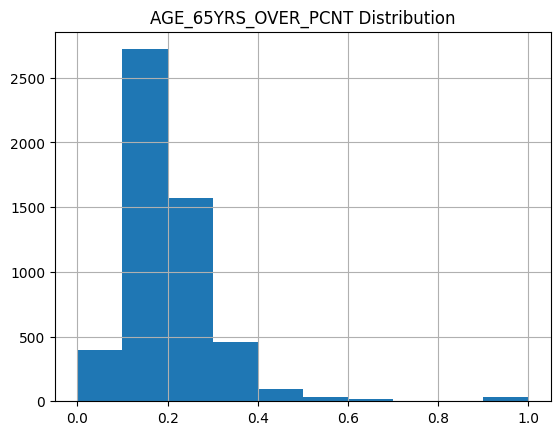

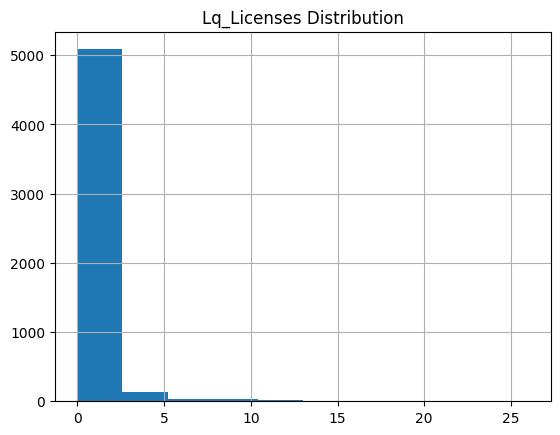

In [6]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# To visualize the skewness of missing data
blackspot_df["AGE_65YRS_OVER_PCNT"].hist()
plt.title("AGE_65YRS_OVER_PCNT Distribution")
plt.show()  # Show first plot

blackspot_df["Lq_Licenses"].hist()
plt.title("Lq_Licenses Distribution")
plt.show()  # Show second plot



In [7]:
#Fill in skewed numeric data with median and mode for lq_license(since it was a count value but stored as float)
blackspot_df.fillna({'AGE_65YRS_OVER_PCNT': blackspot_df['AGE_65YRS_OVER_PCNT'].median(), 'Lq_Licenses': blackspot_df['Lq_Licenses'].mode()}, inplace=True)

print('lq license mode: ',blackspot_df['Lq_Licenses'].mode())


lq license mode:  0    0.0
Name: Lq_Licenses, dtype: float64


In [8]:
from sklearn.impute import KNNImputer

# ... (your code to fill NaNs with mode) ...

if blackspot_df['Lq_Licenses'].isnull().all():
    print("All values are NaN. Imputing with 0.")
    blackspot_df['Lq_Licenses'].fillna(0, inplace=True)  # Or another appropriate constant

elif blackspot_df['Lq_Licenses'].isnull().any():
    print("Some values are still NaN. Using KNN imputation.")
    imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed
    blackspot_df['Lq_Licenses'] = imputer.fit_transform(blackspot_df[['Lq_Licenses']])  # Use double brackets

# Now check again:
print("NaNs in Lq_Licenses after handling:", blackspot_df['Lq_Licenses'].isnull().sum())

Some values are still NaN. Using KNN imputation.
NaNs in Lq_Licenses after handling: 0


In [9]:

# Check for number of missing values in the dataset in each column
print(blackspot_df.isnull().sum())


ID                                 0
EZI_ROAD_NAME                      0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
AGE_18YRS_OVER_PCNT                0
AGE_65YRS_OVER_PCNT                0
SEO_PERSONS_PCNT                   0
FC_COUPLE_NO_CHILDREN_PCNT         0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_SINGLE_PARENT                   0
CARS_ZERO_HH_PCNT                  0
CARS_ONE_HH_PCNT                   0
CARS_TWO_OR_MORE_HH_PCNT           0
DWELLING_SEP_HOUSE_PCNT            0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_FLAT_UNIT_APART_PCNT      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
P

In [10]:
print(blackspot_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [11]:
# To see how many types of road types are there 
print(blackspot_df['ROAD_TYPE'].unique())



['ROAD' 'STREET' 'HIGHWAY' 'DRIVE' 'WAY' 'FREEWAY']


In [12]:
# removing columns ID, EZI_ROAD_NAME, ROAD_NAME, AGE_15_24YRS_PCNT, AGE_25_44YRS_PCNT, AGE_45_64YRS_PCNT, SEO_PERSONS_PCNT
blackspot_df.drop(['ID','EZI_ROAD_NAME','ROAD_NAME','AGE_15_24YRS_PCNT','AGE_25_44YRS_PCNT','AGE_45_64YRS_PCNT','AGE_45_64YRS_PCNT','SEO_PERSONS_PCNT'], axis=1, inplace=True)

In [13]:
blackspot_df.head()

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,ROAD,0.121988,0.853916,0.320783,0.575758,0.303030,0.075758,0.068493,0.429224,0.461187,...,0.358321,0.0,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,ROAD,0.215894,0.741722,0.128477,0.401869,0.518692,0.126168,0.011450,0.225191,0.721374,...,0.000000,1.0,0.0,Intersection,0,0,0,1,0,Blackspot
2,ROAD,0.185304,0.757188,0.169329,0.505155,0.360825,0.103093,0.000000,0.177570,0.785047,...,1.000000,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,STREET,0.167763,0.815789,0.161184,0.454545,0.363636,0.227273,0.054545,0.372727,0.545455,...,0.036599,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,ROAD,0.201238,0.761610,0.145511,0.431579,0.484211,0.052632,0.000000,0.115385,0.884615,...,0.000000,1.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [14]:
# If i want to find the correlations i need to convert object values into numerical. Like ROAD_TYPE, Intersection, Blackspot

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
blackspot_df['ROAD_TYPE'] = le.fit_transform(blackspot_df['ROAD_TYPE'])

In [15]:
blackspot_df['Blackspot'] = blackspot_df['Blackspot'].map({'Blackspot': 1, 'non-Blackspot': 0})

In [16]:
blackspot_df['Intersection'] = blackspot_df['Intersection'].map({'Intersection': 1, 'non-Intersection': 0})

In [17]:
blackspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ROAD_TYPE                        5326 non-null   int64  
 1   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 2   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 3   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 4   FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 5   FC_COUPLE_WITH_CHILDREN_PCNT     5326 non-null   float64
 6   FC_SINGLE_PARENT                 5326 non-null   float64
 7   CARS_ZERO_HH_PCNT                5326 non-null   float64
 8   CARS_ONE_HH_PCNT                 5326 non-null   float64
 9   CARS_TWO_OR_MORE_HH_PCNT         5326 non-null   float64
 10  DWELLING_SEP_HOUSE_PCNT          5326 non-null   float64
 11  DWELLING_SEMID_RO_OR_TCE_H_TH_P  5326 non-null   float64
 12  DWELLING_FLAT_UNIT_A

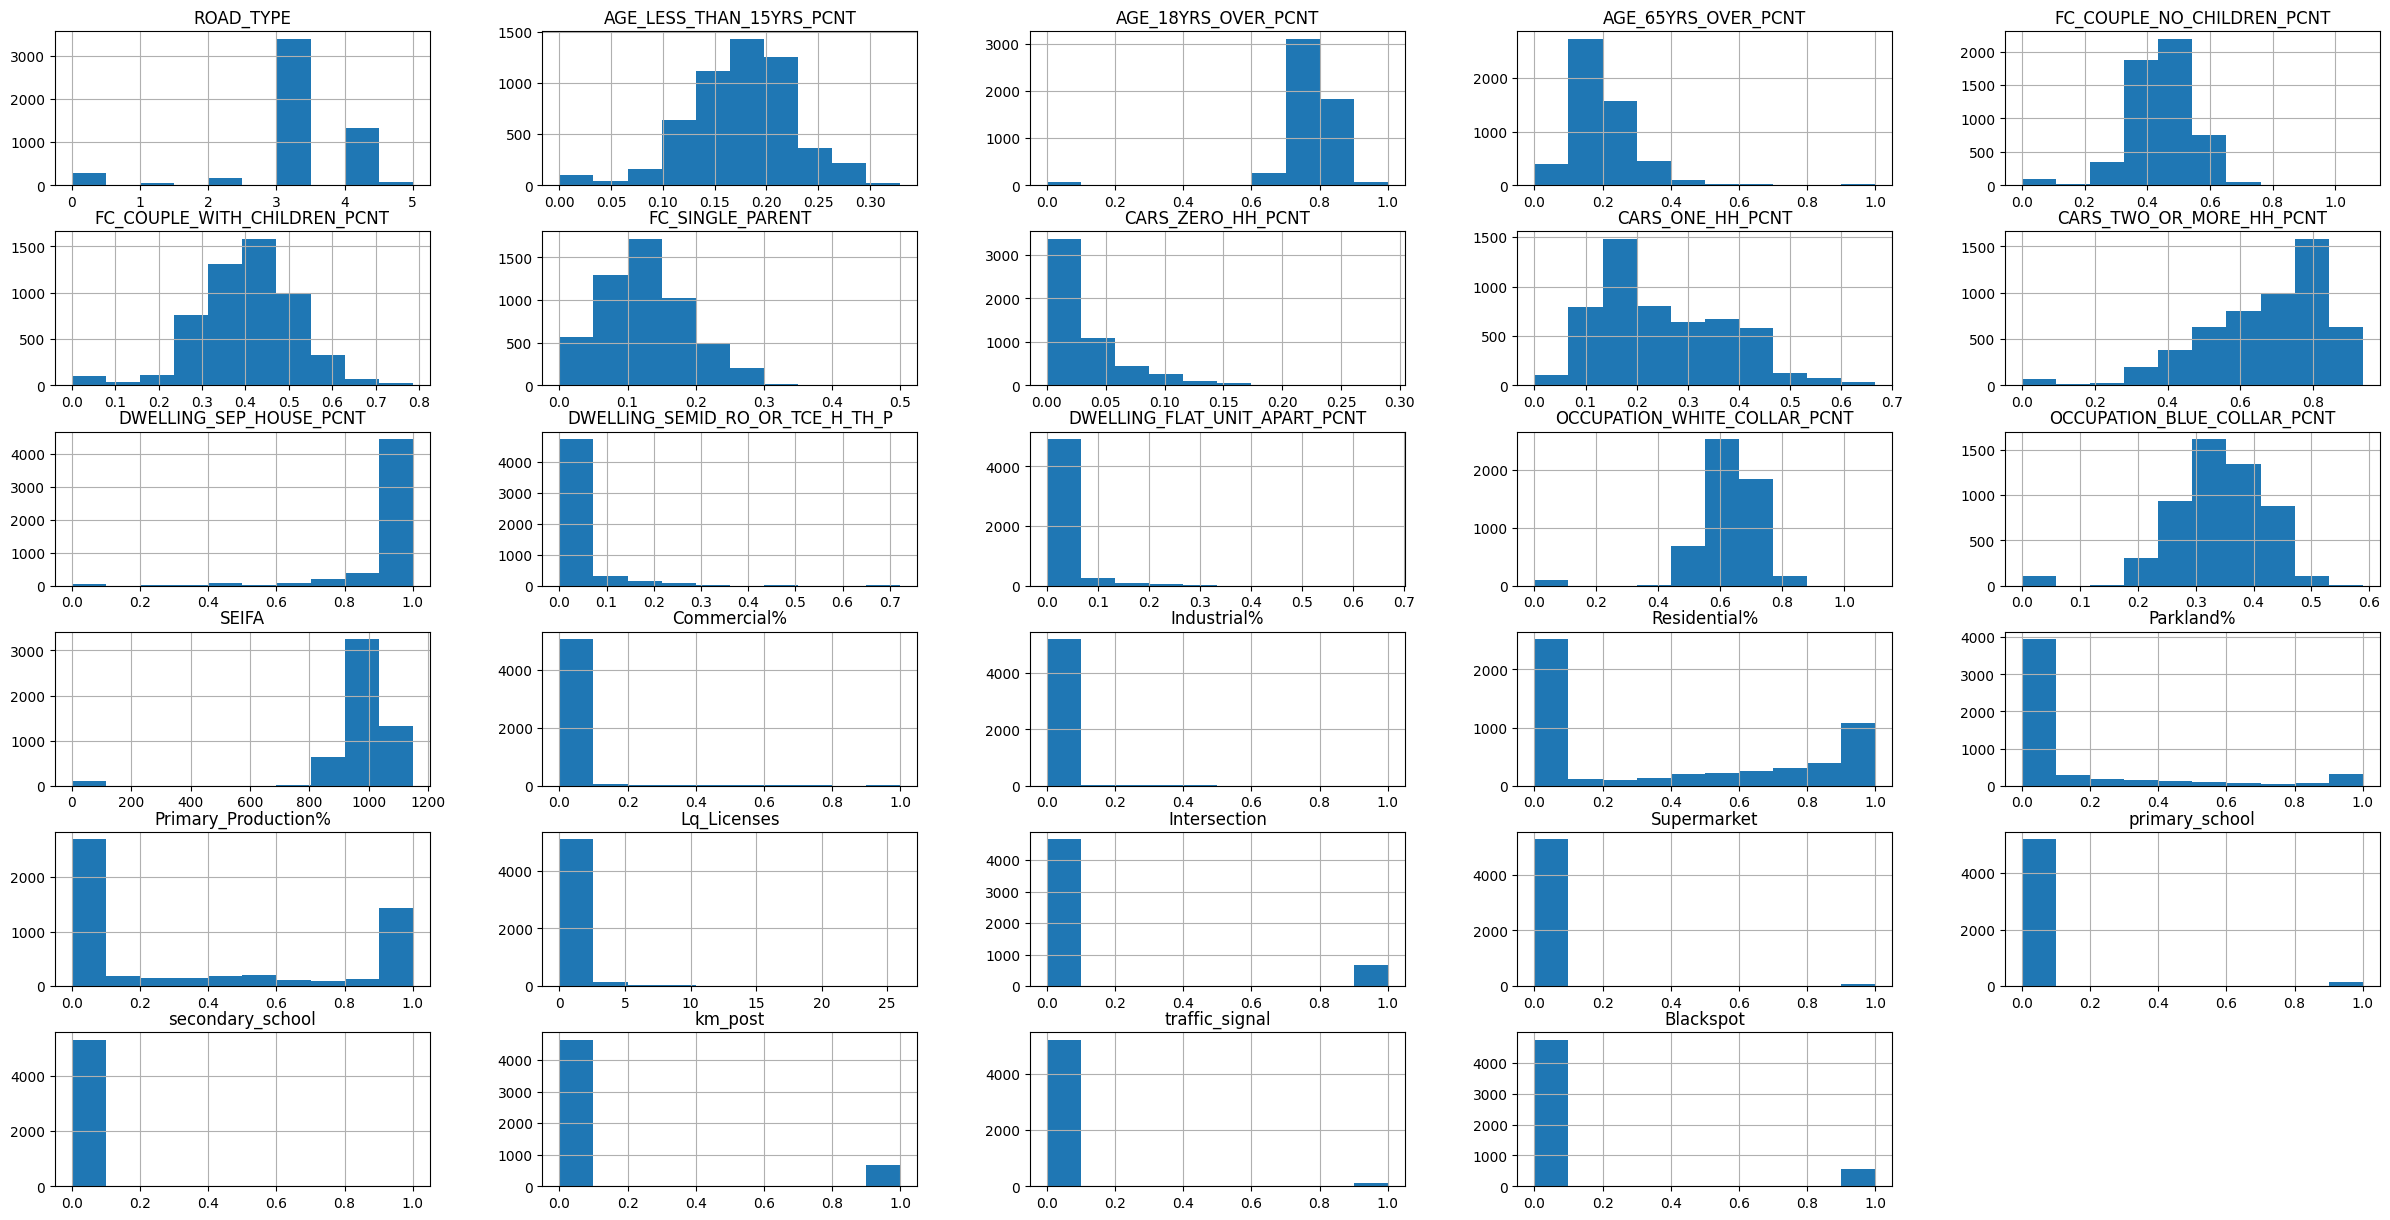

In [18]:
# now we start comparing values by doing data visualisations
# univariate analysis
# Histogram for numerical columns
blackspot_df.hist(figsize=(30, 15))
plt.show()


There are three types of data 
1) Vriables with numerical values - SEICA(Have high values compare to the rest of the data in other columns)
                                - Lq Licenses ( Have values in numbers as it tells how many liquor licences venues in that specific area)
2) Variables that were categorical but mapped with ordered values such as 0,1,2... - Road type
3) Variables that were conversted from categorical to numerical using mapping which has only two values including label 'Blackspot'



In [19]:
blackspot_df.head()

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ZERO_HH_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3,0.121988,0.853916,0.320783,0.575758,0.303030,0.075758,0.068493,0.429224,0.461187,...,0.358321,0.0,14.0,0,0,0,0,0,0,1
1,3,0.215894,0.741722,0.128477,0.401869,0.518692,0.126168,0.011450,0.225191,0.721374,...,0.000000,1.0,0.0,1,0,0,0,1,0,1
2,3,0.185304,0.757188,0.169329,0.505155,0.360825,0.103093,0.000000,0.177570,0.785047,...,1.000000,0.0,0.0,0,0,0,0,0,0,0
3,4,0.167763,0.815789,0.161184,0.454545,0.363636,0.227273,0.054545,0.372727,0.545455,...,0.036599,0.0,0.0,0,0,0,0,0,0,0
4,3,0.201238,0.761610,0.145511,0.431579,0.484211,0.052632,0.000000,0.115385,0.884615,...,0.000000,1.0,0.0,0,0,0,0,0,0,0


In [20]:
blackspot_df.groupby('Blackspot')[['SEIFA', 'Lq_Licenses']].describe()


SEIFA                                                              \
            count        mean         std  min    25%     50%     75%     max   
Blackspot                                                                       
0          4759.0  973.236604  150.784847  0.0  945.0  1002.0  1036.0  1149.0   
1           567.0  962.222222   96.809875  0.0  921.0   978.0  1019.0  1102.0   

          Lq_Licenses                                                
                count      mean       std  min  25%  50%  75%   max  
Blackspot                                                            
0              4759.0  0.181607  0.836572  0.0  0.0  0.0  0.0  26.0  
1               567.0  2.026455  3.698105  0.0  0.0  0.0  3.0  24.0

Why bivariate? What did we understand from analysing all the variables individually?
There is some skewness seen in some variables. to dive further deep if the variables are necessary or have any correlation we dive into bivariate analysis. 

In bivariate analysis we will see does the relation exist and what kind of relation exists. 

AGE_LESS_THAN_15YRS_PCNT           5326
AGE_18YRS_OVER_PCNT                5326
AGE_65YRS_OVER_PCNT                5326
FC_COUPLE_NO_CHILDREN_PCNT         5326
FC_COUPLE_WITH_CHILDREN_PCNT       5326
FC_SINGLE_PARENT                   5326
CARS_ZERO_HH_PCNT                  5326
CARS_ONE_HH_PCNT                   5326
CARS_TWO_OR_MORE_HH_PCNT           5326
DWELLING_SEP_HOUSE_PCNT            5326
DWELLING_SEMID_RO_OR_TCE_H_TH_P    5326
DWELLING_FLAT_UNIT_APART_PCNT      5326
OCCUPATION_WHITE_COLLAR_PCNT       5326
OCCUPATION_BLUE_COLLAR_PCNT        5326
SEIFA                              5326
Commercial%                        5326
Industrial%                        5326
Residential%                       5326
Parkland%                          5326
Primary_Production%                5326
Lq_Licenses                        5326
ROAD_TYPE                          5326
dtype: int64


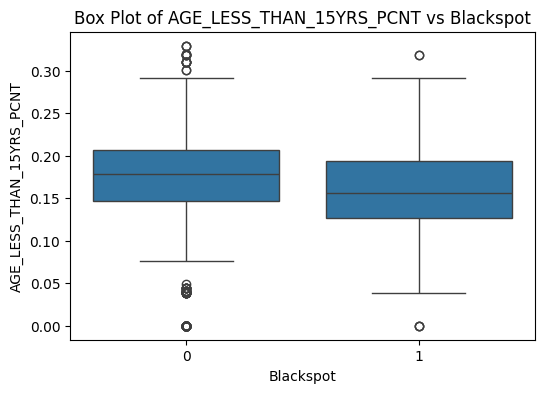

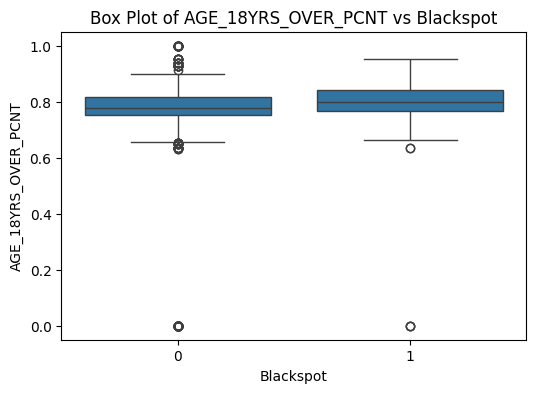

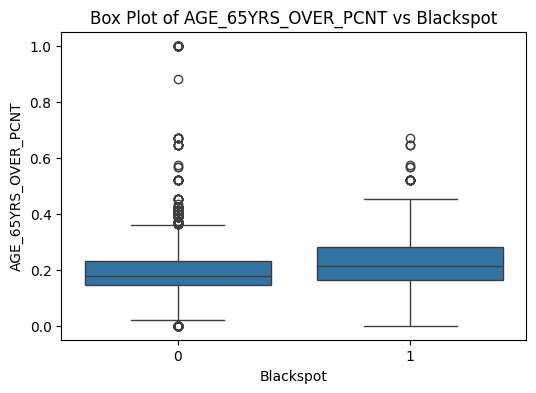

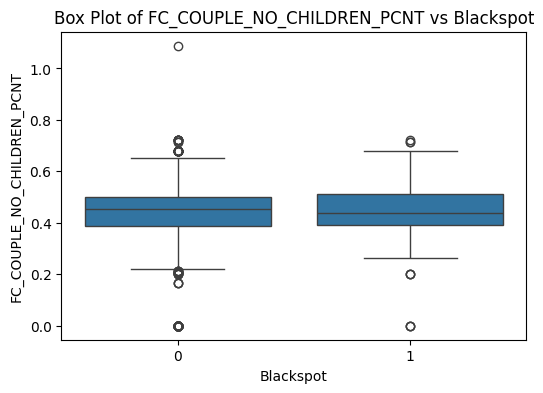

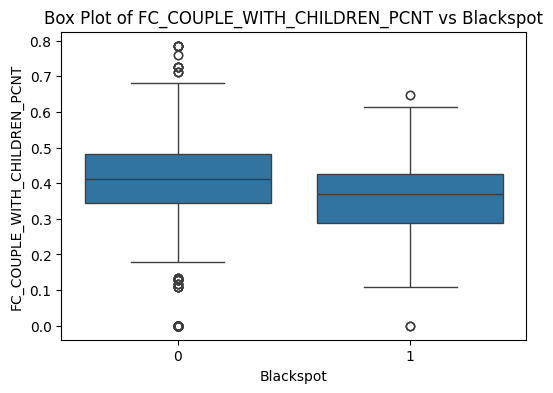

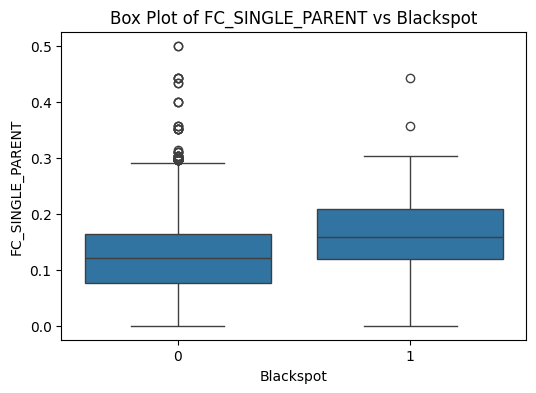

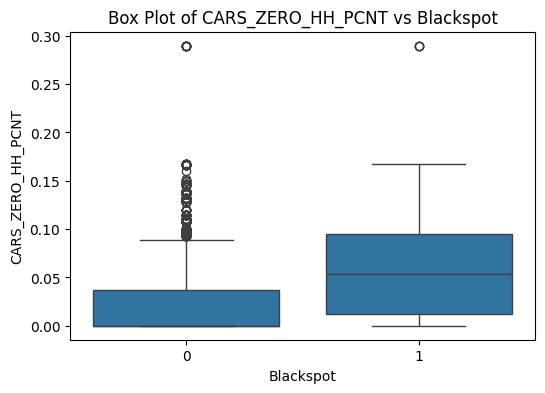

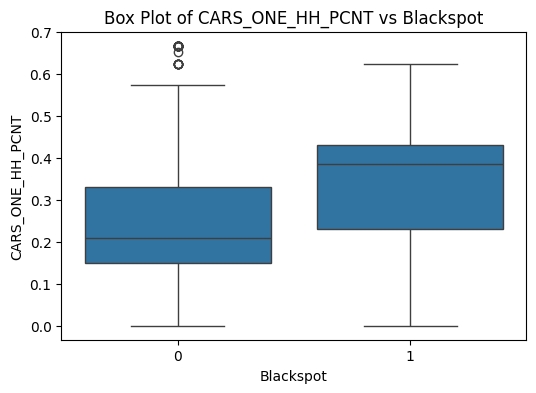

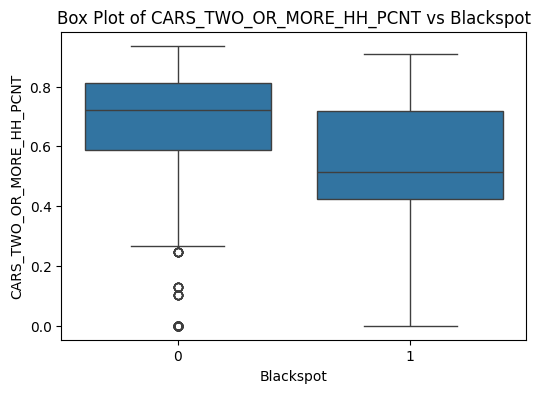

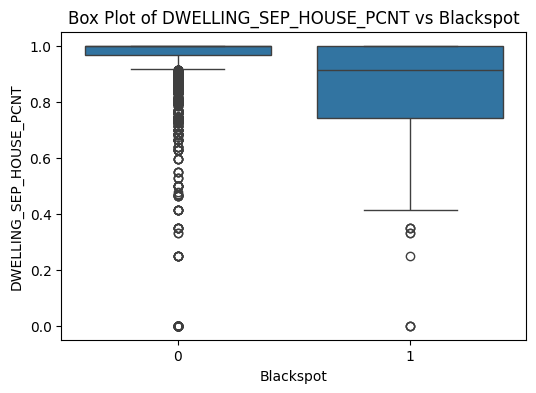

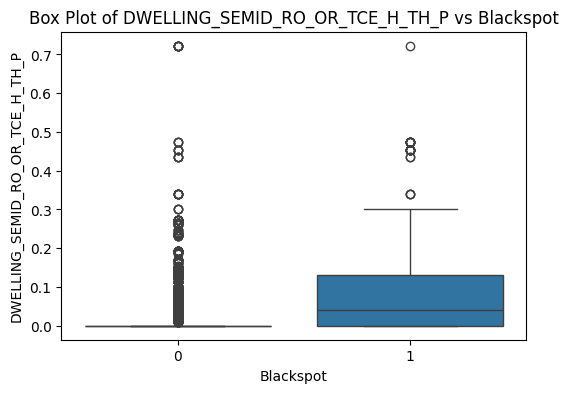

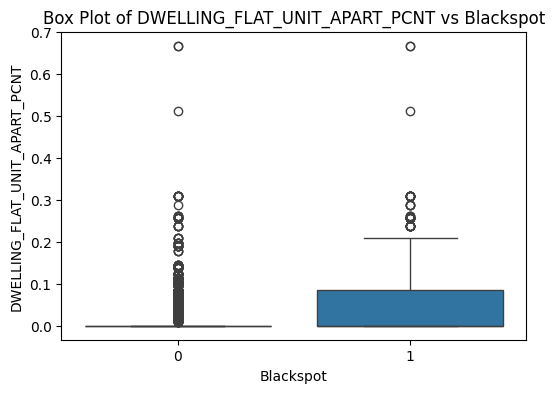

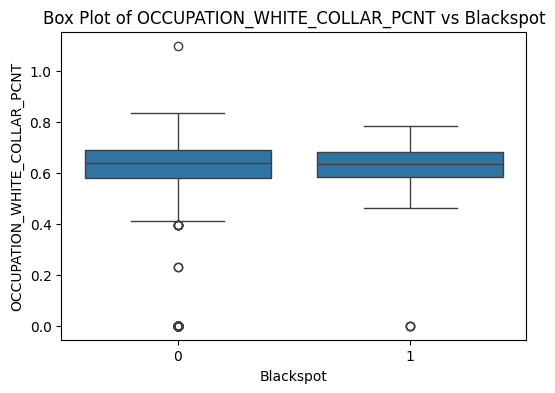

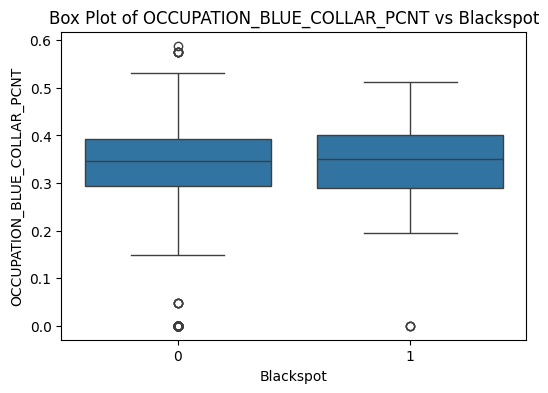

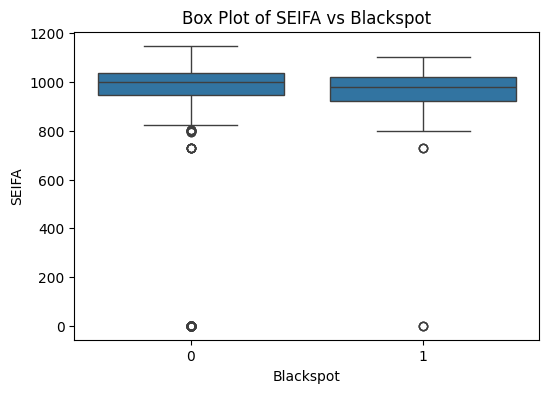

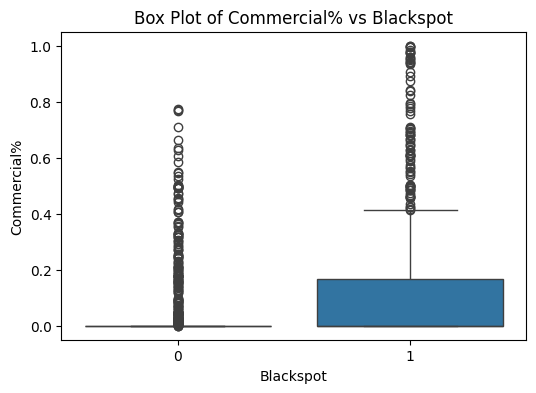

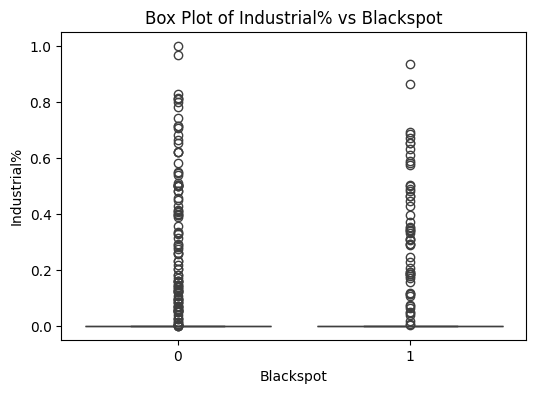

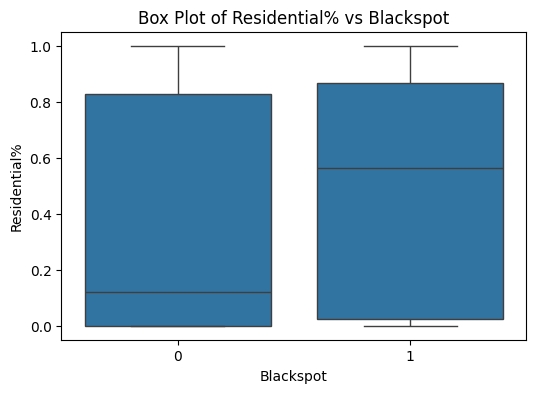

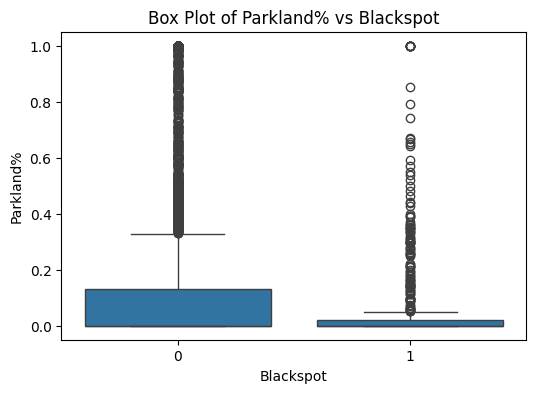

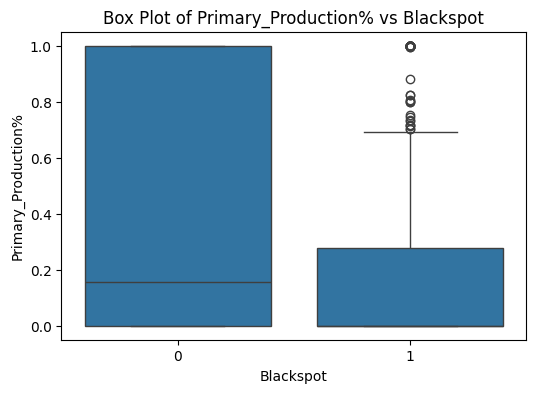

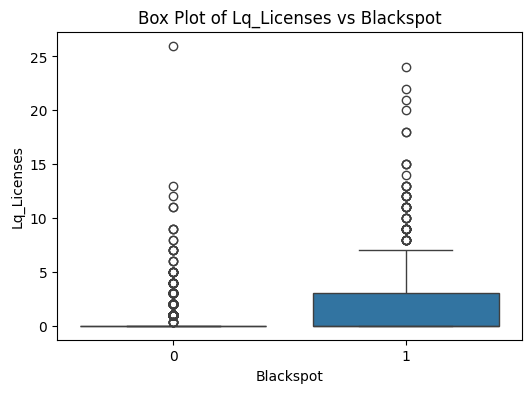

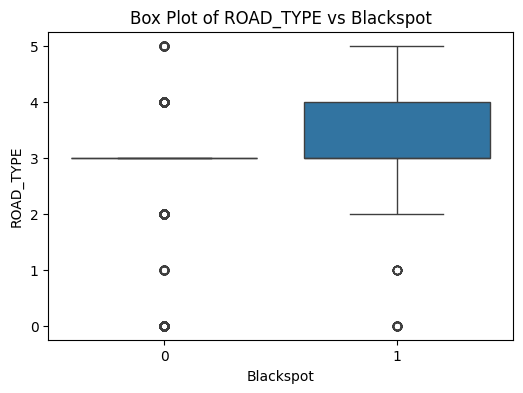

In [21]:
# Select a numerical column to compare
numerical_columns = blackspot_df[['AGE_LESS_THAN_15YRS_PCNT','AGE_18YRS_OVER_PCNT','AGE_65YRS_OVER_PCNT','FC_COUPLE_NO_CHILDREN_PCNT','FC_COUPLE_WITH_CHILDREN_PCNT','FC_SINGLE_PARENT','CARS_ZERO_HH_PCNT','CARS_ONE_HH_PCNT','CARS_TWO_OR_MORE_HH_PCNT','DWELLING_SEP_HOUSE_PCNT','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_FLAT_UNIT_APART_PCNT','OCCUPATION_WHITE_COLLAR_PCNT','OCCUPATION_BLUE_COLLAR_PCNT','SEIFA','Commercial%','Industrial%','Residential%','Parkland%','Primary_Production%','Lq_Licenses','ROAD_TYPE']]
print(numerical_columns.count())
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=blackspot_df["Blackspot"], y=blackspot_df[col])
    plt.title(f"Box Plot of {col} vs Blackspot")
    plt.show()


It looks like the percentage of children under 15 in the area does not strongly influence whether a road is a blackspot or not, based on this plot.

- similarly goes for AGE_18YRS_OVER_PCNT, AGE_65YRS_OVER_PCNT, FC_COUPLE_NO_CHILDREN_PCNT, FC_COUPLE_WITH_CHILDREN_PCNT, FC_SINGLE_PARENT    
- ROAD_TYPE - OVER 75% where there is a chance of occurences for blackspot comes from road type 3,4,5 whichs seems to be a factor for recognizing blackspot. 
- SImilar goes for lq_licenses as well.

- CARS_ZERO_HH_PCNT , CARS_ONE_HH_PCNT   - bit shocking but blackspot regions tend to have more houses that have one or zero car.                
- CARS_TWO_OR_MORE_HH_PCNT - comparitively blackspot region has less number of two cars percentage house but it is still widely spread and can be one of the reasons.          
- DWELLING_SEP_HOUSE_PCNT - Higher proportions of detached houses correlate with fewer blackspots.
Blackspot areas tend to have lower percentages of separate houses, meaning they might have more mixed or dense housing environments (e.g., apartments, row houses).          
- DWELLING_SEMID_RO_OR_TCE_H_TH_P  - Blackspot areas tend to have a higher proportion of semi-detached, row, and townhouse dwellings compared to non-blackspot areas.
This may indicate that urban areas with denser housing structures are more prone to accidents.
The presence of more compact residential areas could contribute to increased traffic congestion and accident risks. 
- DWELLING_FLAT_UNIT_APART_PCNT   - area with blackspot has some percentage of area that has flat unit, only small percentage of those houses   
-  OCCUPATION_WHITE_COLLAR_PCNT, OCCUPATION_BLUE_COLLAR_PCNT , SEIFA - blackspot and non-blackspot has almost same level of distributions in all these categories. No relation can be found here and hence can be removed.                        
- Commercial%  , Industrial%     - only some of the outtliers seems to have some blackspot regions that is spread accrosss, It doesnot perfectly aims that blackspot region has high number of industrial or commercial. still commercial has some blackspot areas but mostly outliers.                   
- Residential% - where there is high percentage of residential has high number of blackspot         
- Parkland% - positive relation b/w low parkland and accident prone area                    
-  Primary_Production%  - %age of primary production area in the blackspot region is comparitively less although it shows some relation and might seem to have eeffects on the blackspot because of the outliers.           
             

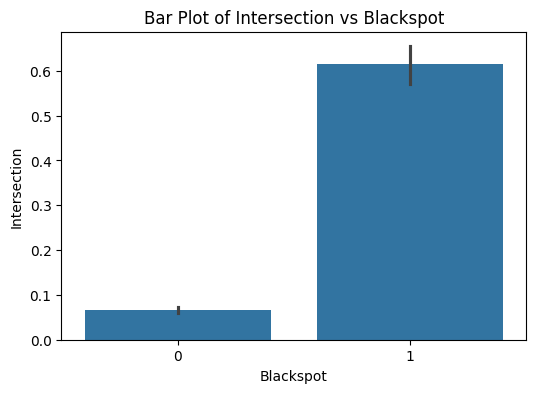

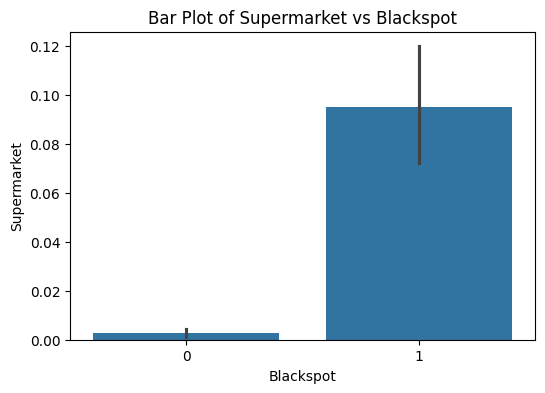

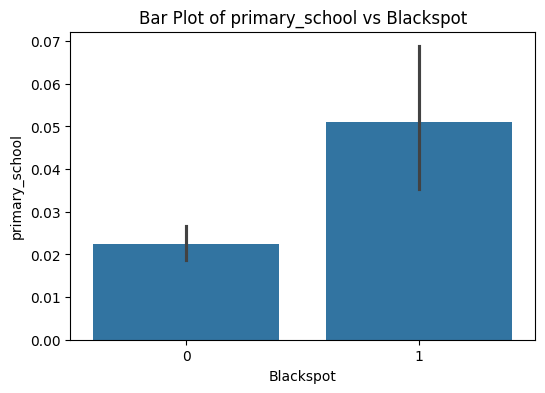

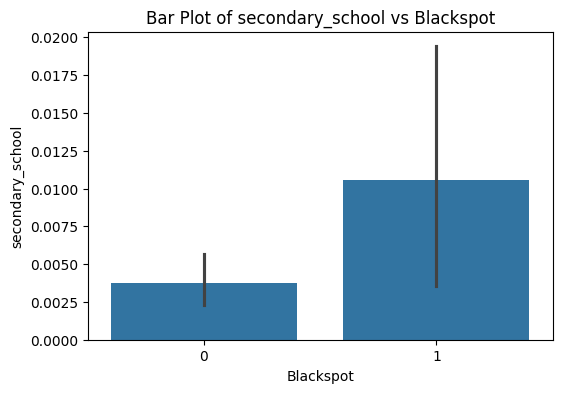

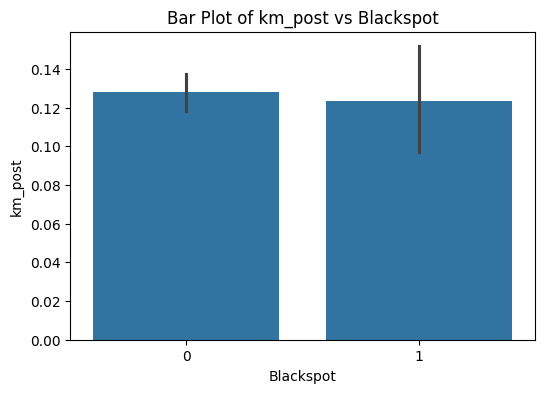

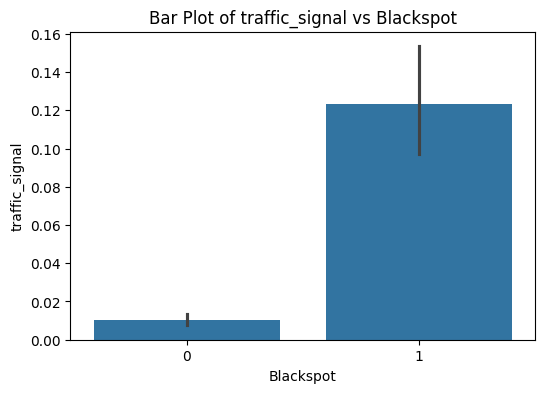

In [22]:
binary_columns = blackspot_df[['Intersection', 'Supermarket', 'primary_school', 'secondary_school', 'km_post','traffic_signal']]
for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=blackspot_df["Blackspot"], y=blackspot_df[col])
    plt.title(f"Bar Plot of {col} vs Blackspot")
    plt.show()

- km_post shows that blackspot and non-blackspot have almost equal number of speed signs. can be the reason of blackspot but other variables willl be morr dependent
- rest primary scool, secondary school, traffic signal, supermarket, intersection all of these, tend to have some relation in respect to blackspot regions. positive relation

#Let's move to multivariate analysis 


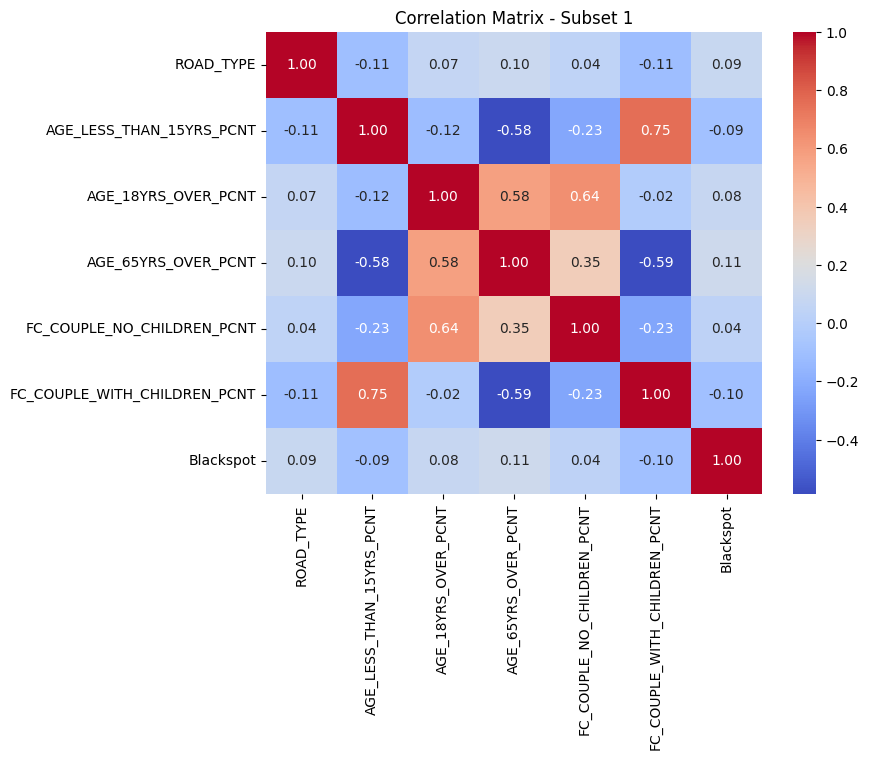

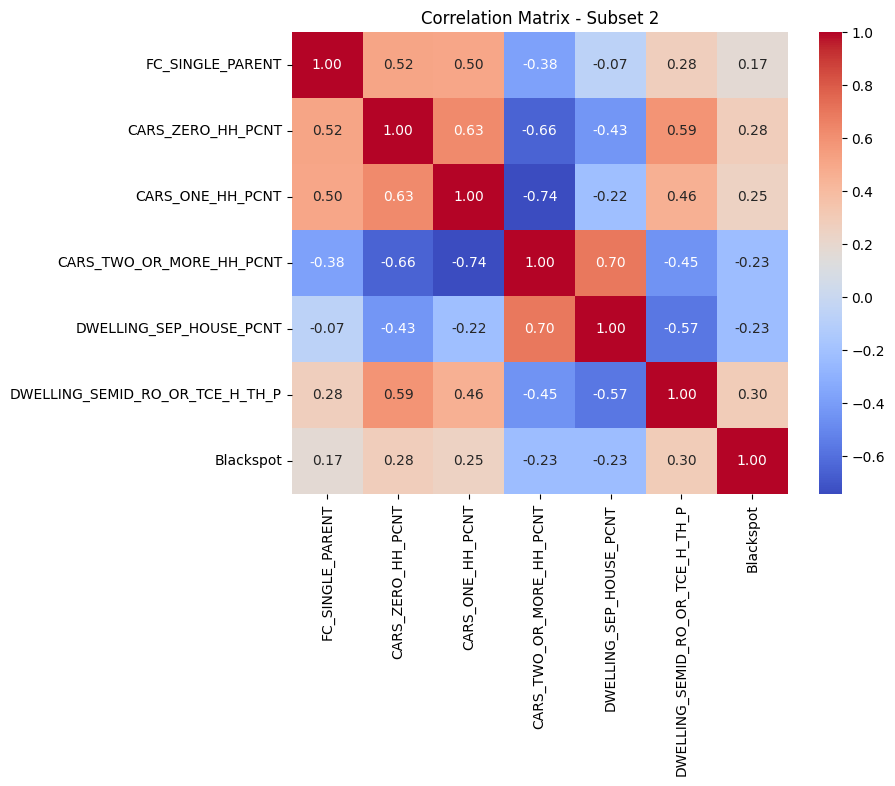

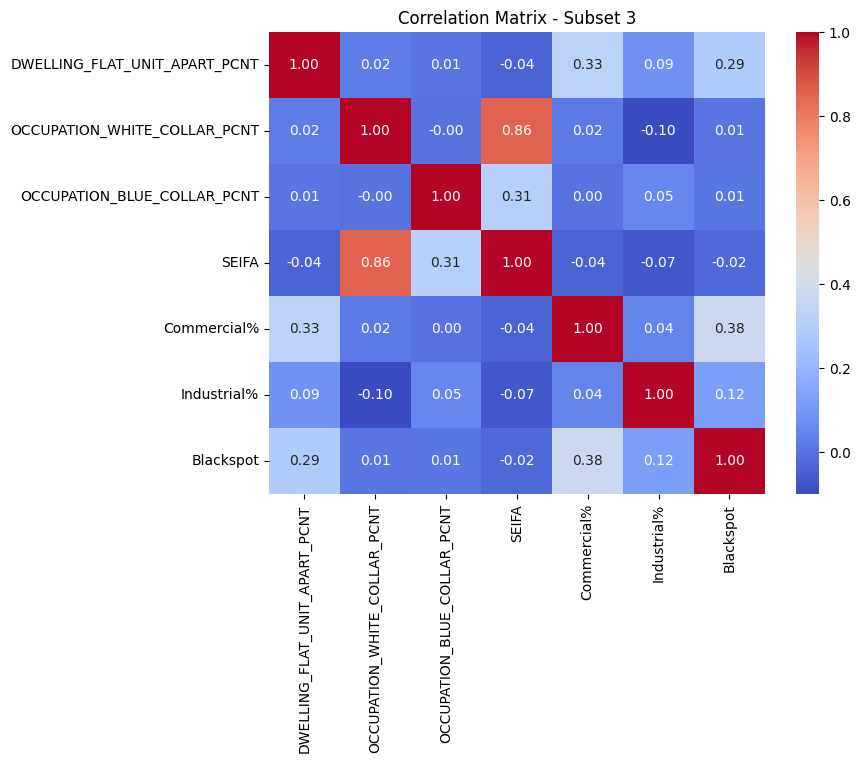

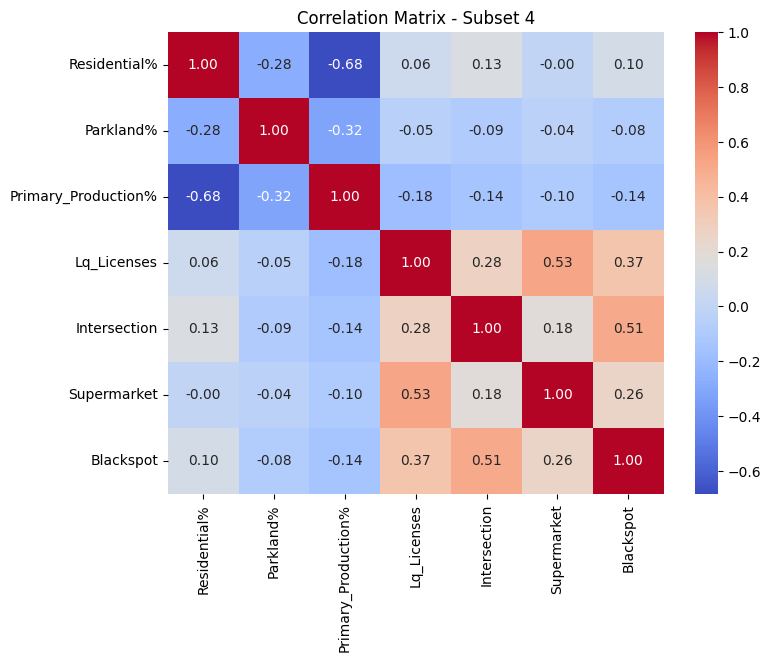

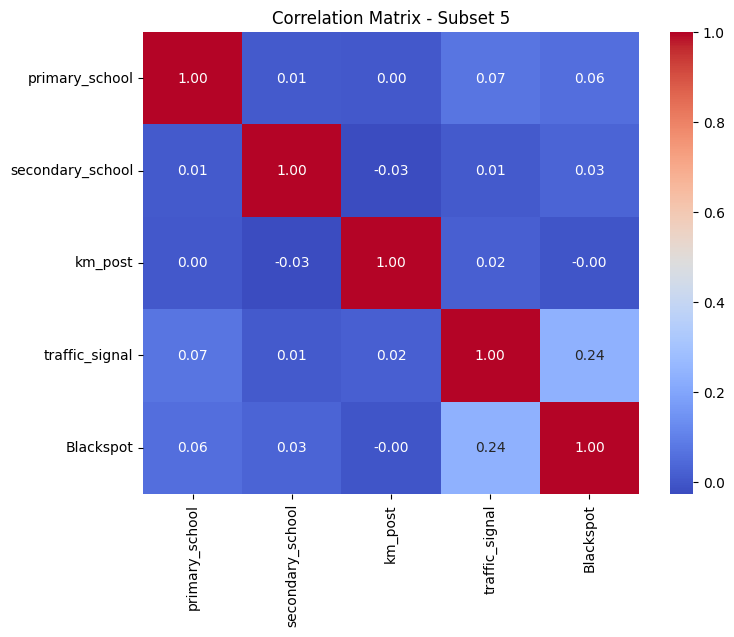

In [23]:
target_variable = 'Blackspot'
feature_variables = [col for col in blackspot_df.columns if col != target_variable]

subset_size = 6
num_subsets = (len(feature_variables) + subset_size - 1) // subset_size  # Calculate number of subsets

for i in range(num_subsets):
    start = i * subset_size
    end = min((i + 1) * subset_size, len(feature_variables))  # Handle the last potentially incomplete subset
    subset_features = feature_variables[start:end]
    subset_data = blackspot_df[subset_features + [target_variable]]

    correlation_matrix = subset_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - Subset {i+1}')
    plt.show()


- trafic_signal : has positive relation. can be a factor that since traffic signals are more, traffic is high and can cause mor accidents.
- km_post : doesnt hold much relation, having a speed sign or not holds the same value for bhaving a blackspot region or not. 
- secondary and primary schools, also doesnt seem to have much affect on blackspot regions.
- places with supermarket and intersection seems to have a positive relation with the balckspot as was seen in bar plot as well.
- places where liquor licenses venues are there also is a high chance of accidents as in box plot as well the non-blackspot regions havve zero liquor licenses except of some outliers. 
- parkland and primary production seem to have negative correlation 
- residential, commercial and industrial have positive correlation 
- type of jobs people are doing and seifa doesnt really seem to have much relation with blackspot region.
- age doesnot have any affect on blackspot region neither does road type.
- areas that have zero cars or one car seem to have postive relation while areas with two cars have negative relation
- having children or no child also doesnt seem to have much affect on blackspot regions. 
- type of also also have some significance when we are looking for blackspot areas. 

Final variables that can be removed 
- km_post, OCCUPATION_WHITE_COLLAR_PCNT, OCCUPATION_BLUE_COLLAR_PCNT, SEIFA, AGE_LESS_THAN_15YRS_PCNT, AGE_18YRS_OVER_PCNT, AGE_65YRS_OVER_PCNT, FC_COUPLE_NO_CHILDREN_PCNT, FC_COUPLE_WITH_CHILDREN_PCNT, FC_SINGLE_PARENT, ROAD_TYPE, primary_school, secondary_school



In [24]:
blackspot_df.drop(['km_post', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'ROAD_TYPE', 'primary_school', 'secondary_school'], axis=1, inplace=True)
blackspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CARS_ZERO_HH_PCNT                5326 non-null   float64
 1   CARS_ONE_HH_PCNT                 5326 non-null   float64
 2   CARS_TWO_OR_MORE_HH_PCNT         5326 non-null   float64
 3   DWELLING_SEP_HOUSE_PCNT          5326 non-null   float64
 4   DWELLING_SEMID_RO_OR_TCE_H_TH_P  5326 non-null   float64
 5   DWELLING_FLAT_UNIT_APART_PCNT    5326 non-null   float64
 6   Commercial%                      5326 non-null   float64
 7   Industrial%                      5326 non-null   float64
 8   Residential%                     5326 non-null   float64
 9   Parkland%                        5326 non-null   float64
 10  Primary_Production%              5326 non-null   float64
 11  Lq_Licenses                      5326 non-null   float64
 12  Intersection        

In [25]:
feature_variables = blackspot_df[['CARS_ZERO_HH_PCNT','CARS_ONE_HH_PCNT','CARS_TWO_OR_MORE_HH_PCNT','DWELLING_SEP_HOUSE_PCNT','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_FLAT_UNIT_APART_PCNT','Commercial%','Industrial%','Residential%','Parkland%','Primary_Production%','Lq_Licenses','Intersection','Supermarket','traffic_signal']]
target_variable = blackspot_df['Blackspot']

x = feature_variables
y = target_variable

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into a training dataset 70% and a test dataset 30%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2025)


In [26]:
print(X_train.shape)
print(y_train.shape)
# Y training set has the label while x training set has the features

(3728, 15)
(3728,)


In [27]:
print(X_test.shape)
print(y_test.shape)

X_train.count()

(1598, 15)
(1598,)


CARS_ZERO_HH_PCNT                  3728
CARS_ONE_HH_PCNT                   3728
CARS_TWO_OR_MORE_HH_PCNT           3728
DWELLING_SEP_HOUSE_PCNT            3728
DWELLING_SEMID_RO_OR_TCE_H_TH_P    3728
DWELLING_FLAT_UNIT_APART_PCNT      3728
Commercial%                        3728
Industrial%                        3728
Residential%                       3728
Parkland%                          3728
Primary_Production%                3728
Lq_Licenses                        3728
Intersection                       3728
Supermarket                        3728
traffic_signal                     3728
dtype: int64

In [28]:
#import linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [29]:
#for evaluating model performance, such as accuracy, precision
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#for summarizing the performance of a classification model on a dataset.
from sklearn.metrics import  classification_report,confusion_matrix
#call metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.925531914893617
Precision:  0.7386363636363636
Recall:  0.40372670807453415
F1:  0.5220883534136547
